# Étude numérique de l’effet de la perfusion tissulaire sur la diffusion thermique dans la peau humaine

## 1. Introduction
L’objectif de ce projet est de modéliser numériquement la diffusion de la chaleur dans la peau humaine à l’aide d’un modèle unidimensionnel, afin de mettre en évidence l’effet de la perfusion tissulaire sur l’évolution de la température. Pour cela, deux cas seront étudiés : en l’absence et en présence de la perfusion tissulaire.
#### Définition de la perfusion tisssulaire
« La perfusion tissulaire est le processus vital d'irrigation sanguine des tissus, apportant oxygène et nutriments et éliminant les déchets via le sang circulant dans les capillaire. » *généré par IA*.

## 2. Contexte physique 
Lorsqu’une source de chaleur est appliquée à une surface, la chaleur se propage vers la profondeur principalement par la conduction.
Cependant, dans un tissu vivant, la perfusion tissulaire intervient comme un mécanisme de régulation thermique. Si la température locale du tissu devient supérieure à la température du sang, le sang tend à évacuer une partie de cette chaleur, ce qui limite l’élévation de température en profondeur.

La modélisation numérique permet de comparer la diffusion de la chaleur dans la peau sans perfusion et avec perfusion tissulaire, afin de mettre en évidence l’effet refroidissant de la perfusion sur la dynamique thermique.
#### Hypothèses de modélisation
Pour obtenir un modèle simple, exploitable et interprétable, on adopte les hypothèses suivantes :

- Modèle 1D : la propagation de la chaleur est considérée uniquement selon la profondeur.

- Peau homogène : la peau est modélisée comme une seule couche équivalente, avec des propriétés thermiques constantes.

- Propriétés indépendantes de la température.

- Pas de génération interne : on néglige toute production interne de chaleur.

- Conditions aux limites simples : une température est imposée à la surface et une température interne est fixée à la profondeur.

## 3. Modèle mathématique
Le transfert thermique dans les tissus biologiques selon une dimension est décrit par l’équation de la bio-chaleur de **Pennes** publié en (1948), qui prend en compte la diffusion thermique dans le tissu et l’échange de chaleur avec le sang.

$$
\rho c \frac{\partial T(x,t)}{\partial t}
=
k \frac{\partial^2 T(x,t)}{\partial x^2}
+
\omega_b c_b \big( T_b - T(x,t) \big)
$$


$T(x,t)$ : température du tissu en fonction de la position $x$ et du temps $t$ [K] ou [°C].

$T_b$ : température du sang, généralement supposée constante de 37 °C [K].

$\rho$ : masse volumique du tissu [kg·m⁻³].

$c$ : capacité thermique massique (chaleur spécifique) du tissu [J·kg⁻¹·K⁻¹].

$k$ : conductivité thermique du tissu [W·m⁻¹·K⁻¹].

$c_b$ : capacité thermique massique du sang [J·kg⁻¹·K⁻¹].

$\omega_b$ : taux de perfusion tissulaire [s⁻¹].


Dans le cas de la diffusion sans perfusion, l’équation se réduit alors à l’équation classique de la chaleur :

$$
\rho c \frac{\partial T(x,t)}{\partial t}
=
k \frac{\partial^2 T(x,t)}{\partial x^2}
$$

## 4. Discrétisation numérique
Afin de résoudre numériquement l’équation de la chaleur , on adopte la méthode de différences finies explicite en une dimension spatiale.

L’épaisseur de la peau est notée $L$. Le domaine spatial $[0,L]$ est discrétisé en un nombre fini $N$ de points régulièrement espacés à l’aide d’un pas spatial $\Delta x$.
Le temps est également discrétisé à l’aide d’un pas de temps $\Delta t$.

Le pas spatial est défini par :
$$
\Delta x = \frac{L}{N}
$$

Afin d’assurer la stabilité de la methode explicite utilisée, le pas de temps doit vérifier la condition suivante :
$$
\Delta t \le \frac{\Delta x^2}{2\alpha}
$$

## 5. Paramètres physiques et conditions aux limites
#### Valeurs des paramètres physiques

Les propriétés thermiques du tissu sont prises égales à 
$\rho = 1000\ \mathrm{kg,m^{-3}}$, 
$c = 3500\ \mathrm{J,kg^{-1},K^{-1}}$,
$k = 0.29\ \mathrm{W,m^{-1},K^{-1}}$ et
$c_b = 3840\ \mathrm{J,kg^{-1},K^{-1}}$, conformément aux valeurs rapportées par **Duck** pour les tissus biologiques.

Le taux de perfusion tissulaire est fixé à 
$\omega = 2.5\times10^{-4}\ \mathrm{s^{-1}}$, valeur médiane issue des traveaux de **Pennes**.

L’épaisseur de la peau est fixée à $L = 2\times10^{-3}\ \mathrm{m}$.

#### Conditions initiales

À l’instant initial $t=0$, la température du tissu est supposée uniforme et égale à la température interne du corps, soit 
$T(x,0) = T_b$ pour tout $x \in [0,L]$, avec $T_b = 37^\circ\mathrm{C}$.

#### Conditions aux limites

À la surface de la peau ($x=0$), une température constante est imposée, telle que 
$T(0,t) = T_s$ pour tout $t>0$, avec $T_s = 50^\circ\mathrm{C}$.
En profondeur ($x=L$), la température est maintenue à la valeur interne du corps, soit 
$T(L,t) = T_b$ pour tout $t>0$.

## 6. Algorithme numérique général
Les étapes suivants présentent la méthodologie numérique adoptée pour déterminer la distibution spatio-temporelle de la température dans la peau humaine.

**Étape 1 : Définition du domaine**

L’épaisseur du tissu est notée $L$.
Le domaine spatial est défini par : $x \in [0, L]$.

**Étape 2 : Discrétisation**

Le domaine spatial est discrétisé en points $x_i$, avec $i = 0, \dots, N_x$, à l’aide d’un pas spatial $\Delta x$ défini par :
$\Delta x = \dfrac{L}{N_x}$.

Le temps est discrétisé en instants $t_n$, avec $n = 0, \dots, N_t$, à l’aide d’un pas de temps $\Delta t$.

La température discrète est notée :
$T(x_i, t_n)$.

**Étape 3 : Initialisation**

La température initiale est imposée sur tout le domaine spatial :
$T(x_i, 0) = T_0$, pour tout $i$.

Les conditions aux limites sont imposées pour tout instant $t_n$ :
$T(0, t_n) = Ts$,
$T(L, t_n) = T_b$.

**Étape 4 : Boucle temporelle**

Pour chaque instant $t_n$, avec $n = 0, \dots, N_t - 1$, et pour chaque point intérieur $i = 1, \dots, N_x - 1$, la température au pas de temps suivant est calculée.

- Cas 1 — Sans perfusion :
$T(x_i, t_{n+1}) = T(x_i, t_n) + \dfrac{k}{\rho c}.\Delta t.\dfrac{T(x_{i+1}, t_n) - 2T(x_i, tn) + T(x_{i-1}, t_n)}{(\Delta x)^2}$.

- Cas 2 — Avec perfusion :
$T(x_i, t_{n+1}) = T(x_i, t_n) + \dfrac{k}{\rho c}.\Delta t.\dfrac{T(x_{i+1}, t_n) - 2T(x_i, tn) + T(x_{i-1}, t_n)}{(\Delta x)^2} + \dfrac{c_b \omega_b}{\rho c}.\Delta t.\bigl(T_b - T(x_i, t_n)\bigr)$.

**Étape 5 : Mise à jour et conditions aux limites**

Après chaque itération temporelle, le champ de température est mis à jour et les conditions aux limites sont réappliquées :
$T(0, t_{n+1}) = Ts$,
$T(L, t_{n+1}) = T_b$.

**Étape 6 : Stockage des résultats**

Les valeurs de $T(x_i, t_n)$ sont enregistrées à différents instants afin d’étudier les profils de température en fonction de la profondeur et l’évolution temporelle de la température en des points choisis.

## 7. Simulation de la diffusion thermique avec et sans perfusion tissulaire
Les deux simulations sont effectuées en utilisant :
- la même discrétisation spatiale et temporelle,
- les mêmes propriétés thermiques du tissu,
- les mêmes conditions initiales et aux limites.
  
La seule différence entre les deux cas réside dans l’introduction du terme de perfusion tissulaire, ce qui permet d’isoler clairement son influence sur l’évolution de la température.

In [329]:
import numpy as np
import matplotlib.pyplot as plt

In [330]:
#Paramètres physiques

rho = 1000               # masse volumique du tissu (kg/m^3)
c   = 3500               # capacité thermique du tissu J/(kg.K)
k   = 0.29               # conductivité thermique du tissu W/(m.K)

cb = 3840                # capacité thermique du sang J/(kg.K) 
omega = 2.5e-4           # taux de perfusion s^(-1) 

In [331]:
#Conditions initiales

L = 3e-3                 # épaisseur de la peau (m)
Tb = 37                  # température interne (°C)
Ts = 50                  # température de surface (°C)

In [332]:
# Discrétisation

N = 60
dx = L/N                 # pas spatial (m)
dt = 0.01                # pas temporel (s), la condition de stabilité est vérifiée: dt <= 0.015
t_final = 60             # s


x = np.linspace(0, L, N+1)
t = np.arange(0, t_final + dt, dt)


In [333]:
# stockage

Ts_10 = Ts_60 = None           
Ta_10 = Ta_60 = None

In [334]:
# Initialisation

T_sans = np.ones(N+1) * Tb     # sans perfusion
T_avec = np.ones(N+1) * Tb     # avec perfusion           

In [335]:
# Boucle temporelle

for n in range(len(t)):

    # Sauvegarde
    if np.isclose(t[n], 10):
        Ts_10 = T_sans.copy()
        Ta_10 = T_avec.copy()
    if np.isclose(t[n], 60):
        Ts_60 = T_sans.copy()
        Ta_60 = T_avec.copy()

    Tn_sans = T_sans.copy()
    Tn_avec = T_avec.copy()

    # Points internes
    for i in range(1, N):

        # Sans perfusion
        Tn_sans[i] = T_sans[i] + (k / (rho * c)) * dt * (T_sans[i+1] - 2*T_sans[i] + T_sans[i-1]) / dx**2
            
        # Avec perfusion
        Tn_avec[i] = T_avec[i] + (k / (rho * c)) * dt * (T_avec[i+1] - 2*T_avec[i] + T_avec[i-1]) / dx**2 + (cb * omega / (rho * c)) * dt * (Tb - T_avec[i])
            

        # Conditions aux limites
        Tn_sans[0] = Ts
        Tn_sans[N] = Tb
    
        Tn_avec[0] = Ts
        Tn_avec[N] = Tb
    
        # Mise à jour
        T_sans = Tn_sans.copy()
        T_avec = Tn_avec.copy()

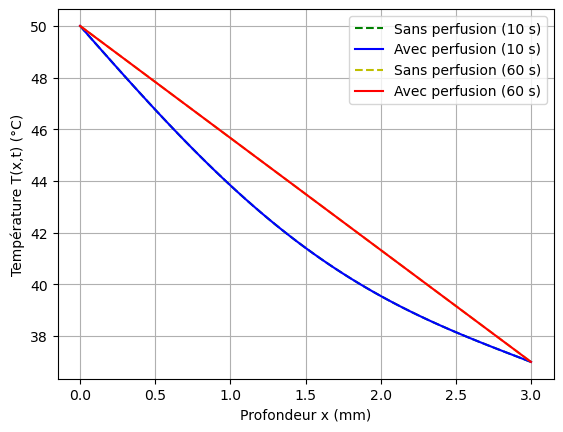

In [336]:
#Tracé

plt.plot(x*1e3, Ts_10, 'g--', label="Sans perfusion (10 s)")
plt.plot(x*1e3, Ta_10, 'b-',  label="Avec perfusion (10 s)")
plt.plot(x*1e3, Ts_60, 'y--', label="Sans perfusion (60 s)")
plt.plot(x*1e3, Ta_60, 'r-',  label="Avec perfusion (60 s)")

plt.xlabel("Profondeur x (mm)")
plt.ylabel("Température T(x,t) (°C)")
plt.legend()
plt.grid()
plt.show()

#### Description des résultats
La figure représente les profils de température T en fonction de la profondeur dans la peau pour deux instants distincts (10 s et 60 s), en comparant les cas avec et sans perfusion tissulaire.

Les courbes avec et sans perfusion tissulaire sont quasiment confondues. Cette superposition indique que l’introduction du terme de perfusion n’entraîne pas de modification significative du profil thermique dans les conditions considérées.

## 8. Conclusion
Dans ce travail, le transfert thermique dans la peau humaine a été étudié à l’aide d’un modèle numérique basé sur l’équation de la bio-chaleur en une dimension. La résolution a permis d’analyser l’évolution de la température avec et sans prise en compte de la perfusion tissulaire.

Les résultats montrent que, dans les conditions considérées, la diffusion thermique est le mécanisme dominant. L’influence de la perfusion tissulaire sur le profil de température reste très faible, ce qui permet, dans ce cas précis, de négliger ce terme sans perte significative d’information sur le comportement thermique du tissu.

## 9. Références
**Physical Properties of Tissues**

Duck, F. A.

Physical Properties of Tissues: A Comprehensive Reference Book, Academic Press, 1990.

**Pennes bioheat equation**

Pennes, H. H.

Analysis of tissue and arterial blood temperatures in the resting human forearm,
Journal of Applied Physiology, vol. 1, pp. 93–122, 1948.